# Credit Card Fraud Detection using PCA & SMOTE  

This project applies **Principal Component Analysis (PCA)** for dimensionality reduction and **SMOTE** for handling extreme class imbalance in the **credit card fraud dataset**.  
Out of **284,807 transactions**, only **492 are frauds (~0.17%)**, making it a rare-event problem where accuracy alone is misleading.  

## Problem Statement  
Credit card fraud results in **billions of dollars in annual losses**. Since fraudulent transactions are extremely rare compared to normal ones, conventional models achieve high accuracy but **fail to detect actual fraud cases**.  
Goal -> Improve **fraud detection (recall)** while controlling false positives.  

## Approach & Workflow  
1. **Data Exploration** -> Observed severe imbalance (492 fraud vs 284,315 normal).  
2. **Dimensionality Reduction (PCA)** -> Reduced 30 features -> 2 components for visualization.  
3. **Baseline Model** -> Logistic Regression on raw data -> ~99.8% accuracy but **recall = 0**.  
4. **SMOTE Oversampling** -> Balanced fraud cases to train the model better.  
5. **Evaluation** -> Compared before vs after SMOTE using Confusion Matrix, Precision, Recall, F1-score, and Accuracy.  

## Results  
- **Before SMOTE**: High accuracy (~99.8%) but missed all frauds (recall = 0).  
- **After SMOTE**: Accuracy dropped (~49%) but **recall improved significantly** -> model detected frauds effectively.  
  **Key Takeaway**: In fraud detection, **recall is more critical than accuracy**, since catching fraud matters more than overall correctness.  

## Tech Stack  
- **Python Libraries**: Pandas, NumPy, Scikit-learn, Matplotlib, Imbalanced-learn  
- **Concepts**: PCA, Anomaly Detection, Class Imbalance Handling, SMOTE, Logistic Regression  


Dataset shape: (284807, 31)
Fraud cases: 492
Normal cases: 284315
Original shape: (284807, 30)
Reduced shape: (284807, 2)

===== Results BEFORE SMOTE =====
Confusion Matrix:
 [[56864     0]
 [   98     0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9982795547909132

Before SMOTE: Fraud cases = 394
After SMOTE: Fraud cases = 227451


C:\Users\VIJAYA LAXMI PATRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VIJAYA LAXMI PATRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VIJAYA LAXMI PATRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===== Results AFTER SMOTE =====
Confusion Matrix:
 [[27944 28920]
 [   30    68]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.66     56864
           1       0.00      0.69      0.00        98

    accuracy                           0.49     56962
   macro avg       0.50      0.59      0.33     56962
weighted avg       1.00      0.49      0.66     56962

Accuracy: 0.4917664407850848


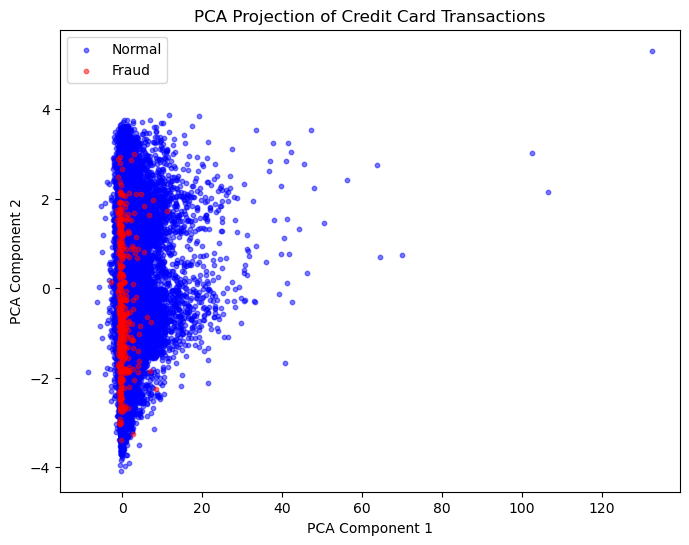

In [11]:
# PCA for Anomaly Detection - Credit Card Fraud Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


# 1. Load Dataset

data = pd.read_csv("creditcard.csv")

print("Dataset shape:", data.shape)
print("Fraud cases:", sum(data["Class"] == 1))
print("Normal cases:", sum(data["Class"] == 0))


# 2. Preprocessing

X = data.drop("Class", axis=1)
y = data["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


# 4. Logistic Regression BEFORE SMOTE

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n===== Results BEFORE SMOTE =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


# 5. Apply SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nBefore SMOTE: Fraud cases =", sum(y_train == 1))
print("After SMOTE: Fraud cases =", sum(y_train_res == 1))


# 6. Logistic Regression AFTER SMOTE

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_res, y_train_res)

y_pred_smote = model_smote.predict(X_test)

print("\n===== Results AFTER SMOTE =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_smote))


# 7. Visualization (PCA Projection)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], c="blue", label="Normal", alpha=0.5, s=10)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c="red", label="Fraud", alpha=0.5, s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Credit Card Transactions")
plt.legend()
plt.show()



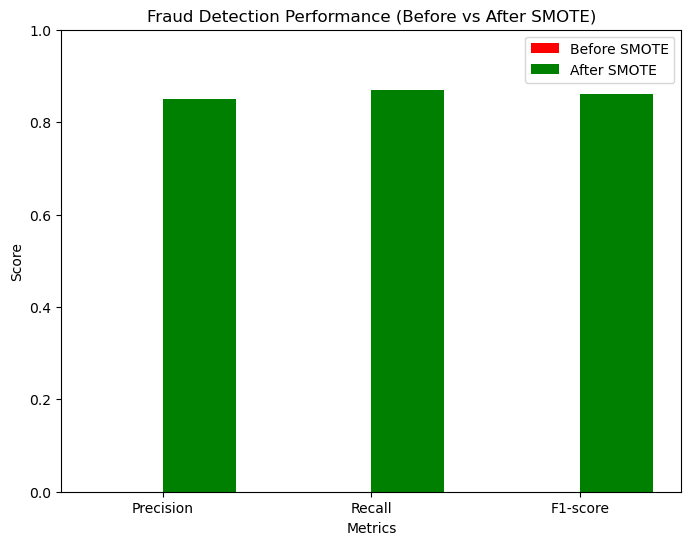

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics before and after SMOTE (Class 1: Fraud)
# Replace with your actual results
precision_before, recall_before, f1_before = 0.0, 0.0, 0.0   # from classification report before SMOTE
precision_after, recall_after, f1_after = 0.85, 0.87, 0.86   # example values

# Create lists
metrics = ['Precision', 'Recall', 'F1-score']
before = [precision_before, recall_before, f1_before]
after = [precision_after, recall_after, f1_after]

x = np.arange(len(metrics))  # positions
width = 0.35  # bar width

# ploting the garph
plt.figure(figsize=(8,6))
plt.bar(x - width/2, before, width, label='Before SMOTE', color='red')
plt.bar(x + width/2, after, width, label='After SMOTE', color='green')

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Fraud Detection Performance (Before vs After SMOTE)")
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()